# Introduction to complex networks theory
## Lesson 9: Models of random networks


In this notebook we investigate random networks.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [8]:
# random.random()
# np.random.rand()

### Example network measurements
Let's return to one of the networks we've already studied, the interactions between game of thrones characters:

In [9]:
data = pd.read_csv('../data/game_thrones/edges.csv')

G_gt = nx.from_pandas_edgelist(data, 
                               source = '# source', 
                               target = ' target')

In [10]:
data.head()

,# source,target,weight
0,0,1,5
1,0,2,31
2,2,82,6
3,2,58,34
4,2,76,12


And let us repeat some of the typical metrics measurement:

In [11]:
N = G_gt.number_of_nodes()
L = G_gt.number_of_edges()

print(f'Number of nodes is {N}, while the number of edges is {L}')

Number of nodes is 107, while the number of edges is 352


In [12]:
degrees = dict(nx.degree(G_gt))
avg_degree = np.mean(list(degrees.values()))

print(f'Average degree is {avg_degree}')

Average degree is 6.579439252336448


In [13]:
2*L/N

6.579439252336448

In [14]:
avg_path_len_gt = nx.average_shortest_path_length(G_gt)
print(f'Average path length is {avg_path_len_gt}')

Average path length is 2.903897019925939


In [15]:
avg_clustering_gt = nx.average_clustering(G_gt)
print(f'Average clustering coefficient is {avg_clustering_gt}')

Average clustering coefficient is 0.5514431515599961


Now that we have thes measures, we are left puzzled if these values are high/low? Is it expected for a network of this size to have large clustering coefficient or small average path? Let's build our expectations using a few different model networks.

### Random regular graph

We might start with a regular graph - that means that every node will have exactly the same degree that we define on input.

In [17]:
?nx.random_regular_graph

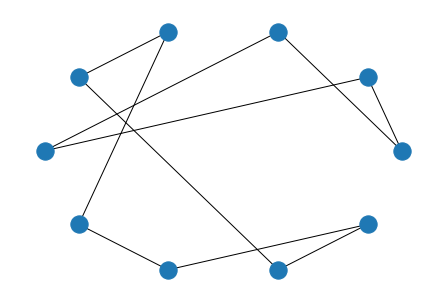

In [22]:
G_regular = nx.random_regular_graph(2,10)
nx.draw_circular(G_regular)

To make it comparable with our GoT network, we can create random regulr graph with the same number of nodes, and the same average degree (closest integer).

In [23]:
avg_degree

6.579439252336448

In [48]:
avg_degree = 2*L/N

G_regular = nx.random_regular_graph(int(avg_degree),N)

In [49]:
G_regular.degree()

DegreeView({36: 6, 53: 6, 55: 6, 93: 6, 21: 6, 37: 6, 58: 6, 86: 6, 48: 6, 63: 6, 11: 6, 23: 6, 44: 6, 47: 6, 43: 6, 60: 6, 22: 6, 46: 6, 18: 6, 30: 6, 70: 6, 77: 6, 69: 6, 90: 6, 99: 6, 27: 6, 102: 6, 103: 6, 31: 6, 81: 6, 54: 6, 92: 6, 32: 6, 106: 6, 13: 6, 91: 6, 56: 6, 61: 6, 38: 6, 89: 6, 76: 6, 5: 6, 82: 6, 96: 6, 6: 6, 65: 6, 39: 6, 62: 6, 8: 6, 72: 6, 35: 6, 12: 6, 64: 6, 100: 6, 45: 6, 105: 6, 17: 6, 34: 6, 98: 6, 9: 6, 101: 6, 68: 6, 83: 6, 0: 6, 75: 6, 88: 6, 97: 6, 51: 6, 67: 6, 59: 6, 16: 6, 28: 6, 26: 6, 49: 6, 80: 6, 84: 6, 2: 6, 3: 6, 10: 6, 25: 6, 19: 6, 71: 6, 24: 6, 50: 6, 95: 6, 20: 6, 78: 6, 57: 6, 87: 6, 1: 6, 29: 6, 33: 6, 15: 6, 85: 6, 7: 6, 73: 6, 94: 6, 52: 6, 74: 6, 4: 6, 79: 6, 14: 6, 40: 6, 41: 6, 42: 6, 104: 6, 66: 6})

The fact that everyone has the same degree is already something we know is not typical for the network we study, but let's investigate other properties:

In [50]:
avg_path_len = nx.average_shortest_path_length(G_regular)
print(f'Average path length is {avg_path_len}')

Average path length is 2.7972138952565686


The average path length is already quite close to the result we've seen, we can check if that is consequence of the mean degree, let's see the values of mean path lengths for a few graphs with the same number of nodes but different mean degree:

In [55]:
for avg_deg in range(2,10):
    G_regular = nx.random_regular_graph(avg_deg,N+1)
    avg_path_len = nx.average_shortest_path_length(G_regular)
    print(f'Average path length in a graph with mean degree {avg_deg} is {avg_path_len}')

Average path length in a graph with mean degree 2 is 27.252336448598133
Average path length in a graph with mean degree 3 is 4.826583592938733
Average path length in a graph with mean degree 4 is 3.607130494980962
Average path length in a graph with mean degree 5 is 3.12184146763586
Average path length in a graph with mean degree 6 is 2.7892004153686396
Average path length in a graph with mean degree 7 is 2.590515749394254
Average path length in a graph with mean degree 8 is 2.459847698165455
Average path length in a graph with mean degree 9 is 2.355313257182416


What about the clustering coefficient:

In [56]:
avg_clustering = nx.average_clustering(G_regular)
print(f'Average clustering coefficient is {avg_clustering}')

Average clustering coefficient is 0.06481481481481473


The clustering coefficient we obtain is very low compared to the clustering we have seen in network of Game of Thrones characters.

Let's see other types of random graphs we can create,

### Erdős-Rényi random networks

Let's first try with random graphs that have fixed N and L. Compared to previous random regular graphs, here node degrees will not be the same, but the total number of links will be the same with every realisation.

Here's a first simple example with small number of nodes and links so that we can see differences in realisations:

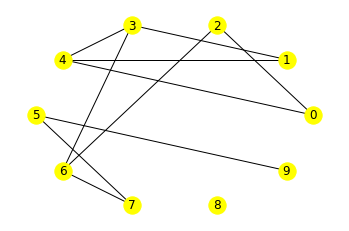

In [64]:
G = nx.gnm_random_graph(10,10)
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G,pos,node_color='yellow')
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.axis('off')
plt.show()

Run previous code several times to see different realisations of graph (different in terms of connectivity, degrees etc) but with always the same number of links.

To create a graph comparable to the GoT, let's create a graph with the same number of nodes and links:

In [66]:
?nx.gnm_random_graph

In [65]:
G_rand = nx.gnm_random_graph(N,L)

Let's start again from the degree, what do you expect?

In [67]:
degrees = dict(nx.degree(G_rand))
avg_degree = np.mean(list(degrees.values()))

print(f'Average degree is {avg_degree}')

Average degree is 6.579439252336448


Given that we kept the same number of links and nodes, the average degree which is function of these two numbers is the same.

Let's see some of the other metrics:

In [68]:
avg_clustering = nx.average_clustering(G_rand)
print(f'Average clustering coefficient is {avg_clustering}')

Average clustering coefficient is 0.05968979099820217


We see that the clustering is still much smaller in a random graph than the one we have observed in a real network.

In [69]:
avg_path_len = nx.average_shortest_path_length(G_rand)
print(f'Average path length is {avg_path_len}')

Average path length is 2.6766002468700405


While the average shortest path is close to the previously observed one.
If you try to run the code above several time (recreate the network and calculate average path) it might happen that the code doesn't work. What do you think why is that?

The created network will not always lead to the connected network, let's see among 100 random realisation, how often the network with the same N and L is connected:

In [74]:
numb_connected = 0
for i in range(100):
    G_rand = nx.gnm_random_graph(N,L)
    numb_connected+= int(nx.is_connected(G_rand))
print(f'Number of times a random graph with {N} nodes and {L} links ended up connected is {numb_connected}')

Number of times a random graph with 107 nodes and 352 links ended up connected is 90


In [73]:
nx.is_connected(G_gt)

True

Another way to create Erdős-Rényi random graphs is to fix the probability of link existence rather than actual number of nodes. That means that if you create network multiple times, the number of links will not be the same, but the expected number of links will.

In [75]:
?nx.random_graphs.erdos_renyi_graph

Here's first the toy example, let's keep the number of links and nodes with the simple graph we used to indroduce gnm_random_graph:

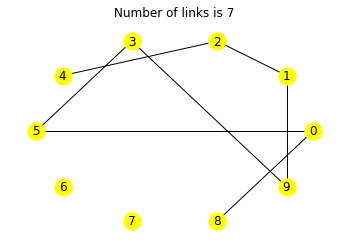

In [83]:
temp_n = 10 
temp_l = 10
p = 2*temp_l/(temp_n*(temp_n-1))
G = nx.random_graphs.erdos_renyi_graph(temp_n,p)
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G,pos,node_color='yellow')
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.axis('off')
plt.title(f'Number of links is {G.number_of_edges()}')
plt.show()

If you rerun previous code multiple times you will see that the number of links we create can vary dramatically, let's see how different it is in 100 different realisations:

In [87]:
p = 2*temp_l/(temp_n*(temp_n-1)) #keep the same p 

total_links = []
for i in range(10000):
    G = nx.random_graphs.erdos_renyi_graph(temp_n,p)
    total_links.append(G.number_of_edges())

In [88]:
total_links[:10]

[12, 9, 15, 7, 7, 9, 11, 10, 12, 11]

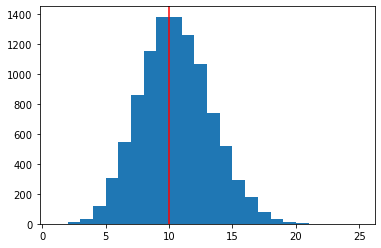

In [101]:
plt.hist(total_links,bins=[*range(min(total_links),max(total_links)+2)])
plt.axvline(x=temp_l,color='red')
plt.show()

In [90]:
np.mean(total_links)

10.0125

How would you create similar histogram with aim to investigate average degree in 100 random graphs?

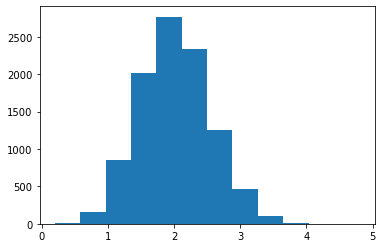

In [107]:
# place for your code here

mdegs = [2*l/temp_n for l in total_links]
plt.hist(mdegs,bins=12)
plt.show()
# mdegs

Now, let's create comparable graph to our GoT graph. To have observed number of links, we will choose probability of link to corresponding graph's density:

In [108]:
N

107

In [109]:
p=nx.density(G_gt)
G_er = nx.random_graphs.erdos_renyi_graph(N,p,seed=5)

As we've seen that the random graphs might be disconnected, we can check that proprety of our created graph:

In [110]:
nx.is_connected(G_er)

True

For this realisation, we can check the average path and clustering:

In [111]:
avg_path_len = nx.average_shortest_path_length(G_er)
print(f'Average path length is {avg_path_len}')

Average path length is 2.73743607829307


In [112]:
avg_clustering = nx.average_clustering(G_er)
print(f'Average clustering coefficient is {avg_clustering}')

Average clustering coefficient is 0.061686288789092526


We can investigate different clustering coefficients that exist in the graph using the standard ways:

Text(0, 0.5, 'Number of nodes')

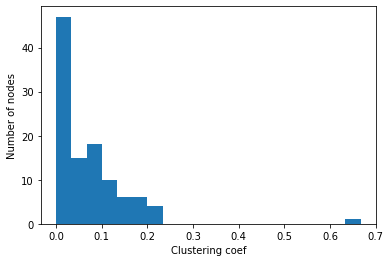

In [113]:
c_er = list(nx.clustering(G_er).values())

plt.hist(c_er,bins=20)
plt.xlabel('Clustering coef')
plt.ylabel('Number of nodes')

In [114]:
np.mean(c_er)

0.06168628878909252

In [115]:
p

0.062070181625815554

As we have seen there is variability in the random graphs we create, let us create 100 different random graphs with same N and p, and calculate their average path length and clustering and compare them with observed values for GoT graph.

In [116]:
random_avg_paths_lens = []
random_clustering = []
for i in range(100):
    G_er = nx.random_graphs.erdos_renyi_graph(N,p)

    while nx.is_connected(G_er)!=True:
        G_er = nx.random_graphs.erdos_renyi_graph(N,p)

    avg_path_len = nx.average_shortest_path_length(G_er)
    avg_clustering = nx.average_clustering(G_er)

    random_avg_paths_lens.append(avg_path_len)
    random_clustering.append(avg_clustering)

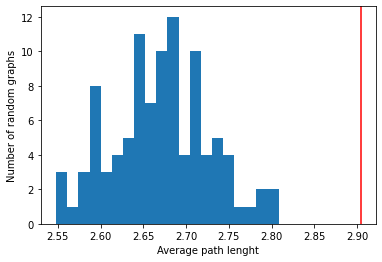

In [117]:
plt.hist(random_avg_paths_lens,bins=20)
plt.axvline(x=avg_path_len_gt,color='red')
plt.xlabel('Average path lenght')
plt.ylabel('Number of random graphs')
plt.show()

As we can observe, although the average shortest path seem similar in value to the is average paths in random graphs, among 100 different realisation, the value we measured in graph of the same average degree is an outlier. Let's see how clustering coeficient looks like:

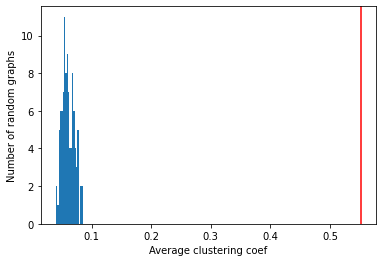

In [118]:
plt.hist(random_clustering,bins=20)
plt.axvline(x=avg_clustering_gt,color='red')
plt.xlabel('Average clustering coef')
plt.ylabel('Number of random graphs')
plt.show()

Here the situation is even more distinct - clustering we observe in real network is about 10 times higher than the mean values we see among different random networks.

#### How many links we would need to add to increase clustering coefficient to the value we observe in the data?

In [121]:
np.linspace(0.05,0.95,19)#[1:-1]

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [122]:
results = []
for p in np.linspace(0,1,21)[1:-1]: #we loop over different link probability values from least connected to most connected
    G_er = nx.random_graphs.erdos_renyi_graph(N,p) # create random graph
    while nx.is_connected(G_er)!=True: # create new graphs until one of them is connected (so that we can measure avg len)
        G_er = nx.random_graphs.erdos_renyi_graph(N,p)
    avg_path_len = nx.average_shortest_path_length(G_er)
    avg_clustering = nx.average_clustering(G_er)
    results.append([p,avg_path_len,avg_clustering])

In [123]:
results

[[0.05, 2.9143008287779932, 0.04228772266155444],
 [0.1, 2.204549462175983, 0.09327339873331017],
 [0.15000000000000002, 1.9194145653323929, 0.15508881291751012],
 [0.2, 1.8229589137718216, 0.19551985521234222],
 [0.25, 1.7427261505907248, 0.25993023101284457],
 [0.30000000000000004, 1.712749074237348, 0.28914373233124274],
 [0.35000000000000003, 1.6536766002468701, 0.3463349601930321],
 [0.4, 1.5984835126080057, 0.40297256337114135],
 [0.45, 1.5447011109151825, 0.45430972519185914],
 [0.5, 1.5046728971962617, 0.4975298745418014],
 [0.55, 1.4572385822606242, 0.5404720221850379],
 [0.6000000000000001, 1.4046905307705873, 0.5935850334348782],
 [0.65, 1.3498501146182331, 0.6484647365660658],
 [0.7000000000000001, 1.293951684006348, 0.7070208003807655],
 [0.75, 1.2486333979897726, 0.7508805893581718],
 [0.8, 1.1974960324457768, 0.8022785474418094],
 [0.8500000000000001, 1.146535002645036, 0.8536831543647856],
 [0.9, 1.102980074061012, 0.8971219938852016],
 [0.9500000000000001, 1.0500793510

In [124]:
res_df = pd.DataFrame(results,
                      columns=['p','mean_path','mean_clustering_coef'])
res_df.head()

,p,mean_path,mean_clustering_coef
0,0.05,2.914301,0.042288
1,0.10,2.204549,0.093273
2,0.15,1.919415,0.155089
3,0.20,1.822959,0.195520
4,0.25,1.742726,0.259930


Text(0, 0.5, 'Avg path len')

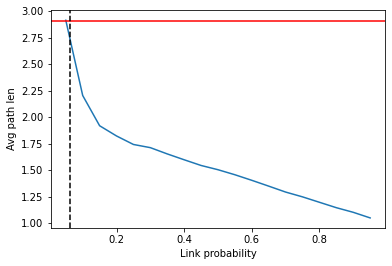

In [129]:
res_df.set_index('p')['mean_path'].plot()
plt.axhline(y=nx.average_shortest_path_length(G_gt),color='red')
plt.axvline(x=2*L/(N*(N-1)),color='black',ls='--')
plt.xlabel('Link probability')
plt.ylabel('Avg path len')

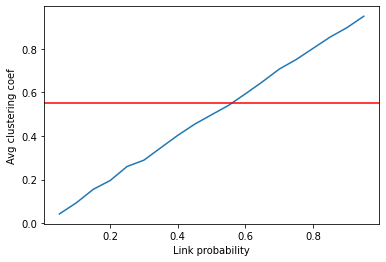

In [135]:
res_df.set_index('p')['mean_clustering_coef'].plot()
plt.axhline(y=nx.average_clustering(G_gt),color='red')
# plt.axvline(x=2*L/(N*(N-1)))
plt.xlabel('Link probability')
plt.ylabel('Avg clustering coef')
plt.show()

To have the observed clustering coefficient, the network would have to have 10 times as many links!

While the shortest path, or at least small world property is well reproduced, the clustering coefficient we observe in reality is quite different

### Watts–Strogatz small-world networks

Networks obtained by rewiring a fraction of regular network.

Let's see how that works in an example. We can start with a regular network of degree 2:

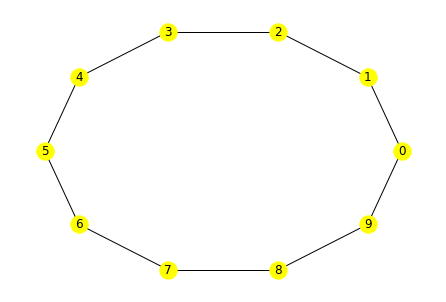

In [140]:
N = 10
G = nx.cycle_graph(N)
nx.draw_circular(G,with_labels=True,node_color='yellow')

To this network, we can add more connections to the nearest neighbours if we want to create a regular network with a higher degree, say 6:

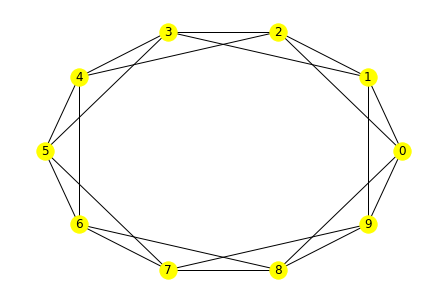

In [141]:
k = 4

for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

nx.draw_circular(G, with_labels=True,node_color='yellow')

Now, the next steps of Watts Strogatz algorithm is rewiring some links with a defined probability p:

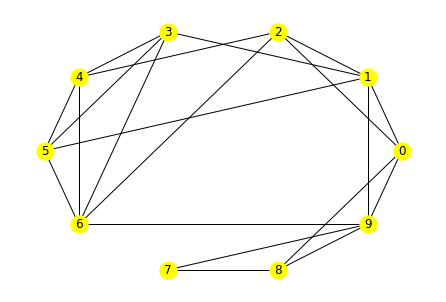

In [142]:
p = 0.2

for u, v in list(G.edges):
    if random.random() < p:
        not_neighbors = set(G.nodes) - set(G.neighbors(u))
        not_neighbors = not_neighbors - {u}
        w = random.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)

nx.draw_circular(G, with_labels=True,node_color='yellow')

We can also rely on a function to do this for us:

In [143]:
?nx.random_graphs.watts_strogatz_graph

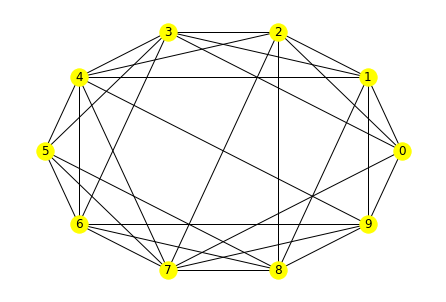

In [145]:
G_ws = nx.random_graphs.watts_strogatz_graph(10,6,0.1)
nx.draw_circular(G_ws, with_labels=True,node_color='yellow')

Let's recreate a graph we have seen in class -> let's calculate how average path length and clustering coefficient depend on rewiring probability p:

In [147]:
N = G_gt.number_of_nodes()
deg = int(2*L/N)

In [148]:
results = []
for p in np.linspace(0,0.5,21):
    G_ws = nx.random_graphs.watts_strogatz_graph(N,deg,p)
    while nx.is_connected(G_ws)!=True:
        G_ws = nx.random_graphs.watts_strogatz_graph(N,deg,p)

    avg_path_len = nx.average_shortest_path_length(G_ws)
    avg_clustering = nx.average_clustering(G_ws)

    results.append([p,avg_path_len,avg_clustering])
res_df = pd.DataFrame(results,columns=['p','avg_path_len','avg_clust_coef'])
res_df.head()

,p,avg_path_len,avg_clust_coef
0,0.000,9.339623,0.600000
1,0.025,6.790866,0.568358
2,0.050,5.254629,0.570761
3,0.075,3.621760,0.422608
4,0.100,3.631106,0.443903


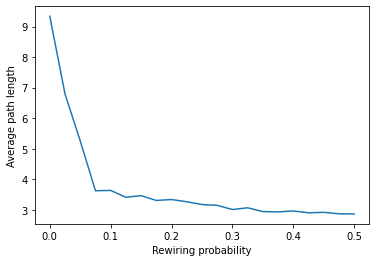

In [149]:
plt.plot(res_df['p'],res_df['avg_path_len'])
plt.xlabel('Rewiring probability')
plt.ylabel('Average path length')
plt.show()

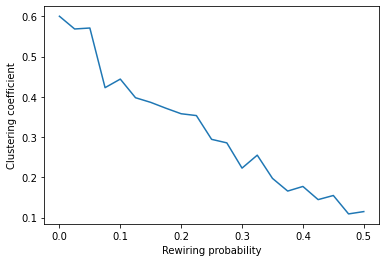

In [150]:
plt.plot(res_df['p'],res_df['avg_clust_coef'])
plt.xlabel('Rewiring probability')
plt.ylabel('Clustering coefficient')
plt.show()

### Barabási–Albert preferential attachment networks

Let's see what's happening with the degree distributions. First, here's degree distribution of the graph from which we started:

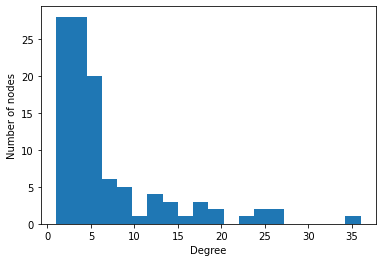

In [151]:
degrees = dict(nx.degree(G_gt))
plt.hist(degrees.values(),bins=20)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

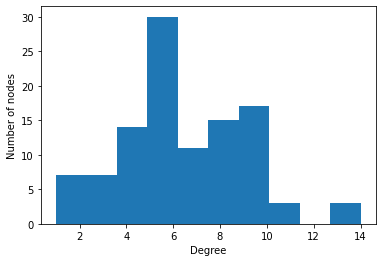

In [152]:
N = G_gt.number_of_nodes()
p=nx.density(G_gt)
G_er = nx.random_graphs.erdos_renyi_graph(N,p,seed=5)

degrees = dict(nx.degree(G_er))
plt.hist(degrees.values())
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [153]:
?nx.random_graphs.barabasi_albert_graph

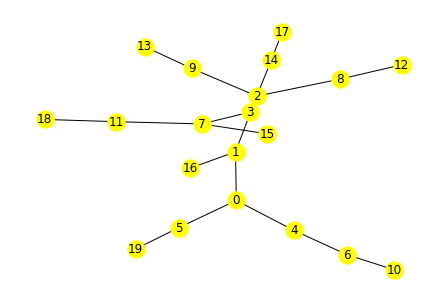

In [154]:
G = nx.random_graphs.barabasi_albert_graph(20, 1)
nx.draw_spring(G,node_color='yellow',with_labels=True)

In [155]:
L = G_gt.number_of_edges()

In [160]:
G_ba = nx.random_graphs.barabasi_albert_graph(N, int(L/N))
#nx.draw_spring(G_ba)

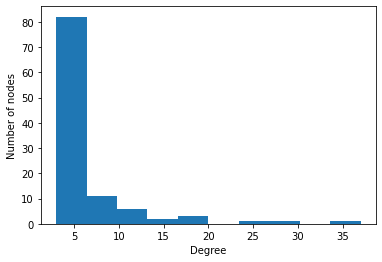

In [161]:
degrees = dict(nx.degree(G_ba))
plt.hist(degrees.values())
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [162]:
random_avg_paths_lens = []
random_clustering = []
for i in range(100):
    G_ba = nx.random_graphs.barabasi_albert_graph(N, int(L/N))

    avg_path_len = nx.average_shortest_path_length(G_ba)
    avg_clustering = nx.average_clustering(G_ba)

    random_avg_paths_lens.append(avg_path_len)
    random_clustering.append(avg_clustering)

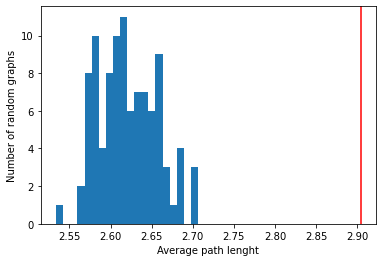

In [163]:
plt.hist(random_avg_paths_lens,bins=20)
plt.axvline(x=avg_path_len_gt,color='red')
plt.xlabel('Average path lenght')
plt.ylabel('Number of random graphs')
plt.show()

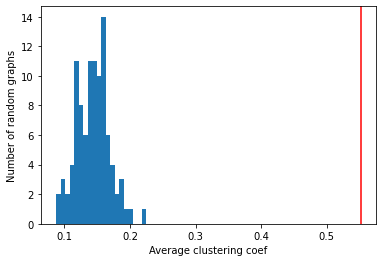

In [164]:
plt.hist(random_clustering,bins=20)
plt.axvline(x=avg_clustering_gt,color='red')
plt.xlabel('Average clustering coef')
plt.ylabel('Number of random graphs')
plt.show()

### Higher order motifs

Remember cliques (maximal fully connected subgraphs)? Finding them in random graphs is even more rare, although they can be found in real networks. Let's see if they exist in our randomly generated graphs:

In [165]:
max_clique_nodes = max(nx.find_cliques(G_er), key=len)
max_clique_nodes

[0, 67, 49]

In [166]:
max_clique_nodes = max(nx.find_cliques(G_ws), key=len)
max_clique_nodes

[25, 26, 27, 28]

In [167]:
max_clique_nodes = max(nx.find_cliques(G_ba), key=len)
max_clique_nodes

[4, 2, 0, 5]

We see that in randomly generated graphs, we see cliques of 3 or 4 nodes. Try creating multiple variants (keeping the same N and p) for these random graphs to see how often you find bigger cliques. 

On the other hand, if we find maximal cliques in our initial network, we see that it is bigger than 3/4 nodes:

In [168]:
max_clique_nodes = max(nx.find_cliques(G_gt), key=len)
max_clique_nodes

[6, 24, 17, 53, 19, 20, 54]